In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import tensorflow as tf
from tensorflow import keras

import sklearn
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

In [2]:
(ztrain,ytrain), (ztest,ytest)=keras.datasets.mnist.load_data()

In [3]:
ztrain[1].shape

(28, 28)

In [4]:
print(ztrain.shape)
print(ytrain.shape)
print(ztest.shape)
print(ytest.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


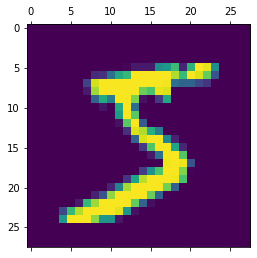

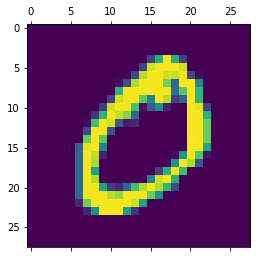

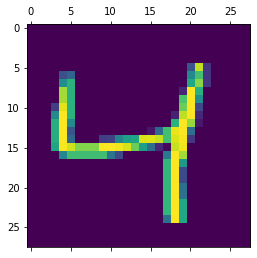

In [5]:
for i in range(0, 3):
    plt.matshow(ztrain[i])
plt.show()    

In [6]:
len(ztrain)

60000

In [7]:
ztrain_flat = ztrain.reshape(len(ztrain),28,28,1)
ztest_flat = ztest.reshape(len(ztest),28,28,1)

In [8]:
cnn = keras.Sequential([
    keras.layers.Conv2D(filters=28, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)),
    keras.layers.MaxPooling2D((2,2)),
    
    keras.layers.Conv2D(filters=16, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    
    keras.layers.Flatten(),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

cnn.compile(optimizer='adam',
           loss='sparse_categorical_crossentropy',
           metrics=['accuracy'])

cnn.fit(ztrain_flat, ytrain, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 31s 16ms/step - loss: 1.0496 - accuracy: 0.8535
Epoch 2/5
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0777 - accuracy: 0.9778
Epoch 3/5
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0556 - accuracy: 0.9825
Epoch 4/5
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0439 - accuracy: 0.9865
Epoch 5/5
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0373 - accuracy: 0.9882


In [9]:
cnn.evaluate(ztest_flat,ytest)

313/313 [==============================] - 2s 5ms/step - loss: 0.0628 - accuracy: 0.9819


[0.06282947957515717, 0.9818999767303467]

In [10]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 28)        280       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 28)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 16)        4048      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
dense (Dense)                (None, 100)               40100     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

In [11]:
ypred=cnn.predict(ztest_flat)
np.argmax(ypred[444])
ypred_label = [np.argmax(i) for i in ypred]
ypred_label[25:35]

[0, 7, 4, 0, 1, 3, 1, 3, 4, 7]

In [12]:
ytest[25:35]

array([0, 7, 4, 0, 1, 3, 1, 3, 4, 7], dtype=uint8)

In [13]:
cm = confusion_matrix(ytest,ypred_label)
cm

array([[ 973,    1,    1,    1,    1,    1,    0,    1,    1,    0],
       [   1, 1127,    0,    3,    1,    0,    0,    1,    2,    0],
       [   1,    1, 1025,    0,    1,    0,    0,    2,    2,    0],
       [   0,    1,    2,  996,    0,    3,    0,    2,    6,    0],
       [   0,    0,    0,    1,  974,    0,    2,    0,    1,    4],
       [   1,    0,    0,   17,    0,  870,    1,    0,    2,    1],
       [  15,    4,    1,    0,    7,    8,  922,    0,    1,    0],
       [   0,    3,   18,    2,    2,    1,    0,  999,    3,    0],
       [   5,    0,    2,    1,    3,    1,    0,    1,  959,    2],
       [   1,    2,    2,    1,   18,    5,    0,    3,    3,  974]],
      dtype=int64)

Text(0.5, 1, 'Heat map for actual and predicted value\nMNIST DATASET')

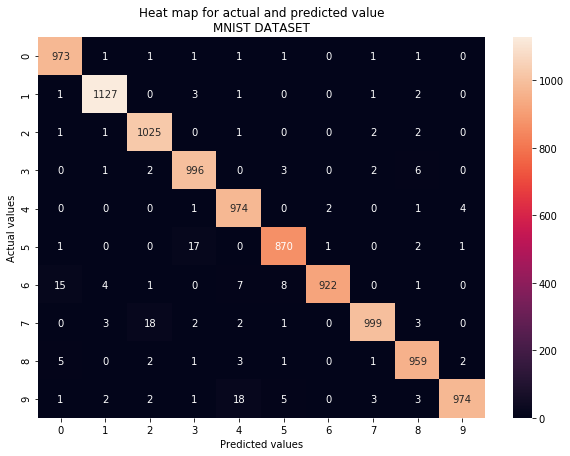

In [14]:
plt.figure(figsize=[10,7])
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Heat map for actual and predicted value\nMNIST DATASET')